In [1]:
import sqlite3

In [3]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [7]:
# 1. Connect to SQLite database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [9]:
# 2. Create a table (only the first time)
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [11]:
# 3. Insert sample data (only for demo — skip if already inserted)
sample_data = [
    ("Laptop", 5, 50000),
    ("Phone", 10, 20000),
    ("Tablet", 3, 15000),
    ("Laptop", 2, 50000),
    ("Phone", 5, 20000)
]

In [13]:
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [15]:
# 4. Run SQL query to get total quantity and revenue per product
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

In [17]:
# 5. Print results
print("\nSales Summary:")
print(df)


Sales Summary:
  product  total_qty   revenue
0  Laptop          7  350000.0
1   Phone         15  300000.0
2  Tablet          3   45000.0


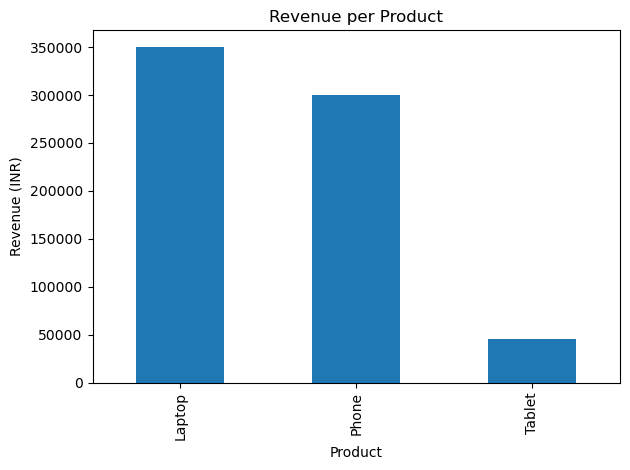

In [19]:
# 6. Plot bar chart of revenue
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue per Product")
plt.xlabel("Product")
plt.ylabel("Revenue (INR)")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Optional: save chart as image
plt.show()
